In [1]:
from __future__ import print_function
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras.utils.vis_utils import plot_model
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
data=pd.read_csv('heart_statlog_cleveland_hungary_final (1).csv')
data.head()
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])
X[0]
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
X[0]
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size = 0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test, y_test,  test_size = 0.5)

In [4]:
X_train[0]

array([-1.03911562, -1.79857595,  0.82048698, -0.66193088,  0.07532349,
       -0.52092948,  0.34676216, -0.96964985, -0.79521891, -0.84979236,
       -1.02321701])

In [5]:
print(X.shape)

(1190, 11)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=11, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
   
   
   
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()
print(binary_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
history2=binary_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300)

Epoch 1/300
30/30 [==============================] - 2s 18ms/step - loss: 0.5637 - accuracy: 0.7994 - val_loss: 0.4280 - val_accuracy: 0.8151
Epoch 2/300
30/30 [==============================] - 0s 10ms/step - loss: 0.4151 - accuracy: 0.8372 - val_loss: 0.3963 - val_accuracy: 0.8319
Epoch 3/300
30/30 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.8445 - val_loss: 0.3843 - val_accuracy: 0.8403
Epoch 4/300
30/30 [==============================] - 0s 5ms/step - loss: 0.3842 - accuracy: 0.8508 - val_loss: 0.3791 - val_accuracy: 0.8403
Epoch 5/300
30/30 [==============================] - 0s 7ms/step - loss: 0.3780 - accuracy: 0.8487 - val_loss: 0.3723 - val_accuracy: 0.8403
Epoch 6/300
30/30 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.8561 - val_loss: 0.3685 - val_accuracy: 0.8403
Epoch 7/300
30/30 [==============================] - 0s 6ms/step - loss: 0.3614 - accuracy: 0.8582 - val_loss: 0.3682 - val_accuracy: 0.8487
Epoch 8/300

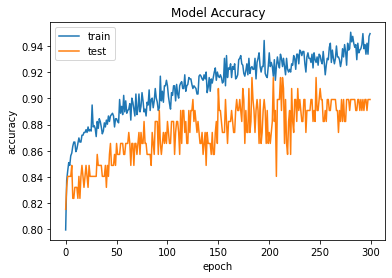

In [8]:
%matplotlib inline
# Model accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

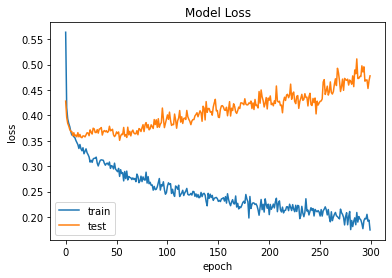

In [9]:
# Model Losss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [10]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred2 = np.round(binary_model.predict(X_val)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_val, binary_pred2))
print(classification_report(y_val, binary_pred2))

Results for Binary Model
0.8991596638655462
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        60
           1       0.86      0.95      0.90        59

    accuracy                           0.90       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.90      0.90      0.90       119



In [11]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred2 = np.round(binary_model.predict(X_train)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_train, binary_pred2))
print(classification_report(y_train, binary_pred2))

Results for Binary Model
0.9642857142857143
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       449
           1       0.96      0.97      0.97       503

    accuracy                           0.96       952
   macro avg       0.96      0.96      0.96       952
weighted avg       0.96      0.96      0.96       952



In [12]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.8991596638655462
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        52
           1       0.89      0.94      0.91        67

    accuracy                           0.90       119
   macro avg       0.90      0.89      0.90       119
weighted avg       0.90      0.90      0.90       119

